# <span style="color:#1111AA"> Michelson interferometer: Mirror asymmetries </span>

# Table of content

# 1.  Overview

## 1.1. Introduction

The aim of this session is to look at how the response of a Michelson interferometer depends on mirror asymmetries, such as different transmission/reflection in the arm mirrors, and non-symmetric beam splitter. We will continue to use the FINESSE-model we built in the [previous session](01_Lengths_and_tunings.ipynb).

## 1.2. Prerequisites and reading material

We recommend that you have done the following notebooks before starting this one:
* 01_Introduction
    * 01_Ipython_notebook
        * [01_Ipython_notebook](../../01_Introduction/01_Ipython_notebook/01_Ipython_notebook.ipynb)
    * 02_Finesse
        * [01_Introduction](../../01_Introduction/02_Finesse/01_Introduction.ipynb)
    * 03_Pykat
        * [01_Introduction](../../01_Introduction/03_Pykat/01_Introduction.ipynb)
        * [02_Plotting_Examples](../../01_Introduction/03_Pykat/02_Plotting_Examples.ipynb)

or have corresponding basic experience of Ipython notebooks, PyKat, and Finesse. The links above only works if you started ipython notebook in the top directory of this course.

**Reading material and references:**

[1] [A. Freise, K. Strain, D. Brown, and C. Bond, "Interferometer Techniques for Gravitational-Wave Detection", *Living Reviews in Relativity* **13**, 1 (2010)](http://arxiv.org/pdf/0909.3661v3).

[2] [A. Freise, D. Brown, and C. Bond, "Finesse, Frequency domain INterferomEter Simulation SoftwarE"](http://kvasir.sr.bham.ac.uk/redmine/attachments/download/131/Finesse_2.0_manual.pdf).

[3] [FINESSE syntax reference](http://www.gwoptics.org/finesse/reference/)

## 1.3. After this session you will be able to...

**After this session you will be able to**:
  * Something

# 2.  Modelling a Michelson Interferometer using FINESSE

## 2.1. Importing packages

We start by loading some necessary packages:

In [2]:
import numpy as np                         # Importing numpy
import matplotlib                          # Importing matplotlib, so we can plot figures
import matplotlib.pyplot as plt                   
from pykat import finesse                  # Importing the pykat.finesse package
from pykat.commands import *               # Importing all packages in pykat.commands.
from IPython.display import display, HTML  # Allows us to display HTML.

# Telling the notebook to make plots inline.
%matplotlib inline      
# Initialises the PyKat plotting tool. Change the dpi-value to make plots appear smaller/bigger on your screen.
pykat.init_pykat_plotting(dpi=90)          

## 2.2 Optical Layout

Below is the optical layout of a simple Michelson. The laser beam is splitted by the beam splitter (BS) and propagates in both X and Y arms. Gravitational wave detectors are calibrated such that when the two beams are recombined at the beam splitter, they interfere (close to) destructively at the output port (a.k.a. south port, assymetric port, dark port), and they intefere constructively at the west port (a.k.a. symmetric port, bright port). Mirror movements or gravitational waves change the differential arm lenghth $\Delta L = L_y - L_x$, which produces a signal at the output port where we place a photodiode. See section 5.2 in the review article if you want a longer description of the Michelson interferometer.

<img src="files/michelson.png" style="width: 500px;"/>

## 2.4. The FINESSE-model

We use the same FINESSE-model as in the [previous session](01_Lengths_and_tunings.ipynb), which matches the layout above, and we set one of the mirror tunings to 90 degrees so that we operate at the dark fringe, which we calibrated in the previous session.

In [20]:
basekat = finesse.kat()    # Initialising Finesse
basekat.verbose = False    # Tells Finesse to talk less

basecode = """

## Parameters ##
const Pin 1M         # Laser power [W]
const LX 4000        # Length of X arm [m]
const LY 4000        # Length of Y arm [m]

## Laser & Beam splitter ##
l laser $Pin 0 n0                         # Laser
s s1 1 n0 nbsc                            # Space from laser to beam splitter
bs BS 0.5 0.5 0 45 nbsc nbsY nbsX nbsd    # Central 50/50 beam splitter with 0 tuning and 45 deg angle of incidence.

## X arm ##
s LX $LX nbsX nmX1         # Space between beam splitter and mirror mX
m mX 1 0 0 nmX1 nmX2       # Test mass mirror mX (reflectivity 1, 0 transmissivity, and 0 deg tuning)

## Y arm ##
s LY $LY nbsY nmY1         # Space between beam slitter and mirror mY
m mY 1 0 90 nmY1 nmY2      # Test mass mirror mY (reflectivity 1, 0 transmissivity, and 0 deg tuning)

## Output port ##
s sout 1 nbsd nout         # Space from BS to a measurement device not yet defined

"""
basekat.parseCommands(basecode)  # passing the input text to the Finesse object

We call this kat-object *basekat* since it describes the core optics of the system we will investigate throughout this notebook. The above basekat-object will not be altered much throughout the Notebooks about the Michelson interferometer, however, what we measure and the specific simulation instructions will. Therefore we can copy the above basekat objet by using `deepcopy`, and then add on the specific simulation instructions.

# 3. Your tasks: 


## 3.1. Beam splitter asymmetry 

Change the beam splitter to be not 50:50. Run the above simulatin again but with different reflectivities for the beam splitter. Plot the results and describe the effects of the BS asymmetry on Michelson output signal. Hint: use for example `kat.BS.R = 0.7` and `kat.BS.T = 0.3` to set it to a 70:30 beam splitter.

**Answer:**

In [31]:
kat1 = deepcopy(basekat)
code = '''
pd pout nbsd                     # Photo diode at the dark port

#ad Xarm 0 nbsX*
#ad Yarm 0 nbsY*

xaxis mX phi lin -60 60 200
put* mY phi $mx1

yaxis abs
'''
kat1.parseKatCode(code)
out1 = kat1.run()
kat1.BS.R=0.2
kat1.BS.T=0.8
out1a = kat1.run()
kat1.BS.R=0.4
kat1.BS.T=0.6
out1b = kat1.run()
kat1.BS.R=0.6
kat1.BS.T=0.4
out1c = kat1.run()
kat1.BS.R=0.8
kat1.BS.T=0.2
out1d = kat1.run()

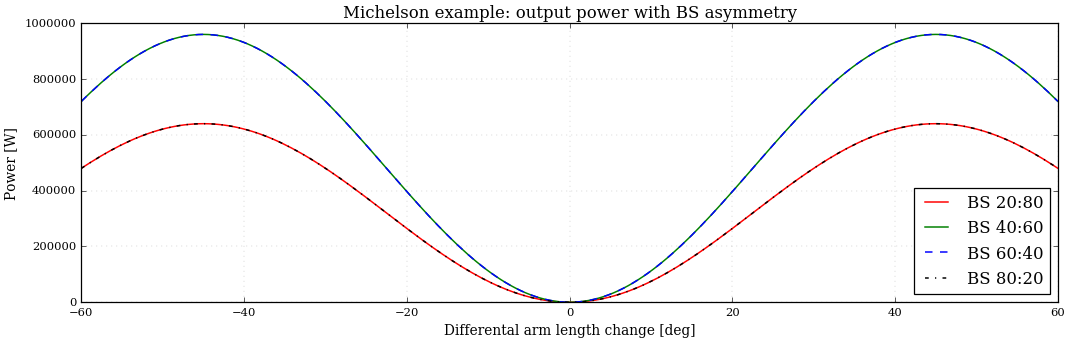

In [32]:
plt.figure(figsize=(14,4))
plt.plot(out1a.x,out1a['pout'],'-', color='r',label='BS 20:80')
plt.plot(out1b.x,out1b['pout'],'-', color = 'g', label='BS 40:60')
plt.plot(out1c.x,out1c['pout'],'--', color='b', label='BS 60:40')
plt.plot(out1d.x,out1d['pout'],'-.', color='k', label='BS 80:20')
plt.title(r'Michelson example: output power with BS asymmetry')
plt.xlabel('Differental arm length change [deg]')
plt.xlim([min(out1a.x),max(out1a.x)])
plt.legend(loc=4)
plt.ylabel('Power [W]')
plt.grid(True)

## 3.2. Arm mirror asymmetry 
Change the reflectivity of the mX end mirror and run the simulation again.

** Answer: **

In [29]:
kat2 = deepcopy(basekat)
code = """
pd pout nbsd

#ad Xarm 0 nbsX*
#ad Yarm 0 nbsY*

xaxis mX phi lin -60 60 200
put* mY phi $mx1

yaxis abs
"""
kat2.parseKatCode(code)
kat2.mX.R=1
out2a = kat2.run()
kat2.mX.R=0.6
out2b = kat2.run()
kat2.mX.R=0.1
out2c = kat2.run()
kat2.mX.R=0.0
out2d = kat2.run()

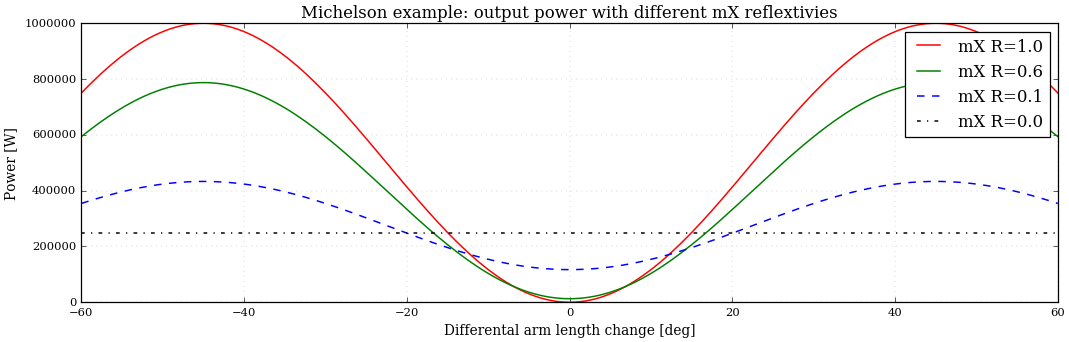

In [33]:
plt.figure(figsize=(14,4))
plt.plot(out2a.x,out2a['pout'],'-', color = 'r', label='mX R=1.0')
plt.plot(out2b.x,out2b['pout'],'-', color = 'g', label='mX R=0.6')
plt.plot(out2c.x,out2c['pout'],'--',color = 'b', label='mX R=0.1')
plt.plot(out2d.x,out2d['pout'],'-.',color = 'k', label='mX R=0.0')
plt.title(r'Michelson example: output power with different mX reflextivies')
plt.xlabel('Differental arm length change [deg]')
plt.xlim([min(out2a.x),max(out2a.x)])
plt.legend(loc=1)
plt.ylabel('Power [W]')
plt.grid(True)

In [15]:
show_finesse(kat5)

% Generated by PyKat 08.01.2016 14:08:26

l l1 1000000.0 0.0 0.0 n0
s s1 1.0 n0 nbsc
bs BS 0.5 0.5 0.0 45.0 nbsc nbsY nbsX nbsd
s LX 4000.0 nbsX nmX1
m mX 1.0 0.0 0.0 nmX1 nmX2
s LY 4000.08 nbsY nmY1
m mY 1.0 0.0 90.00572712278269 nmY1 nmY2
s sout 1.0 nbsd nout
pd0 pout nbsd
ad Xarm 0 nbsX*
ad Yarm 0 nbsY*
xaxis mX phi lin -60 60 200
put* mY phi $mx1
yaxis lin abs
